In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, confusion_matrix, mean_squared_error

# Load dataset
df = pd.read_csv("ecoli_mdr_dataset.csv")

# Features and target
X = df.drop(columns=["StrainID", "Source", "MDR_Label"])
y = df["MDR_Label"]

# Initialize 5-fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

sensitivity_scores = []
specificity_scores = []
roc_scores = []
rmse_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train SVM classifier
    model = SVC(kernel="rbf", probability=True, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Metrics
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_test, y_prob)
    rmse = mean_squared_error(y_test, y_prob) # Removed squared=False

    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    roc_scores.append(roc_auc)
    # Append the square root of MSE to get RMSE
    rmse_scores.append(np.sqrt(rmse))


# Report average metrics
print("5-Fold Cross Validation Results:")
print(f"Sensitivity: {np.mean(sensitivity_scores):.3f} ± {np.std(sensitivity_scores):.3f}")
print(f"Specificity: {np.mean(specificity_scores):.3f} ± {np.std(specificity_scores):.3f}")
print(f"ROC AUC: {np.mean(roc_scores):.3f} ± {np.std(roc_scores):.3f}")
print(f"RMSE: {np.mean(rmse_scores):.3f} ± {np.std(rmse_scores):.3f}")

5-Fold Cross Validation Results:
Sensitivity: 0.944 ± 0.050
Specificity: 0.957 ± 0.055
ROC AUC: 0.999 ± 0.002
RMSE: 0.154 ± 0.028


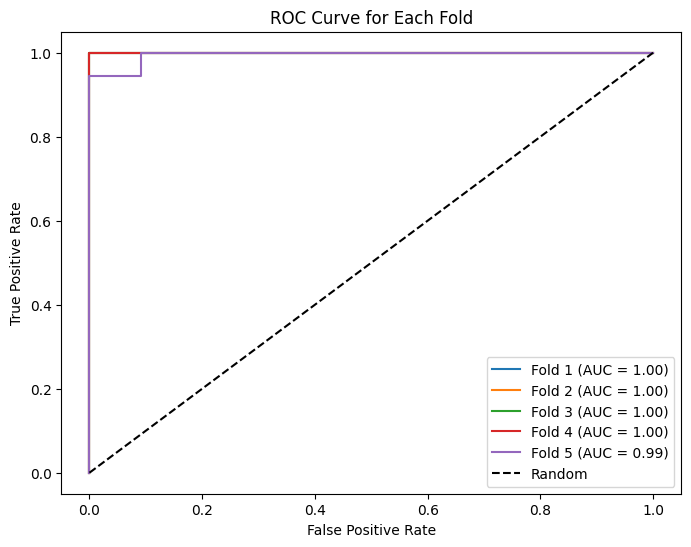

5-Fold Cross Validation Results:
Sensitivity: 0.944 ± 0.050
Specificity: 0.957 ± 0.055
ROC AUC: 0.999 ± 0.002
RMSE: 0.154 ± 0.028


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, confusion_matrix, mean_squared_error, roc_curve

# Load dataset
df = pd.read_csv("ecoli_mdr_dataset.csv")

# Features and target
X = df.drop(columns=["StrainID", "Source", "MDR_Label"])
y = df["MDR_Label"]

# Initialize 5-fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

sensitivity_scores = []
specificity_scores = []
roc_scores = []
rmse_scores = []

plt.figure(figsize=(8, 6))

for fold, (train_index, test_index) in enumerate(skf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train SVM classifier
    model = SVC(kernel="rbf", probability=True, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Metrics
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_test, y_prob)
    rmse = np.sqrt(mean_squared_error(y_test, y_prob)) # Removed squared=False and took square root

    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    roc_scores.append(roc_auc)
    rmse_scores.append(rmse)

    # ROC Curve (for plotting)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'Fold {fold} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Fold')
plt.legend()
plt.show()

# Report average metrics
print("5-Fold Cross Validation Results:")
print(f"Sensitivity: {np.mean(sensitivity_scores):.3f} ± {np.std(sensitivity_scores):.3f}")
print(f"Specificity: {np.mean(specificity_scores):.3f} ± {np.std(specificity_scores):.3f}")
print(f"ROC AUC: {np.mean(roc_scores):.3f} ± {np.std(roc_scores):.3f}")
print(f"RMSE: {np.mean(rmse_scores):.3f} ± {np.std(rmse_scores):.3f}")

confusion matrix heatmap (averaged across folds) for a clearer view of classification performance

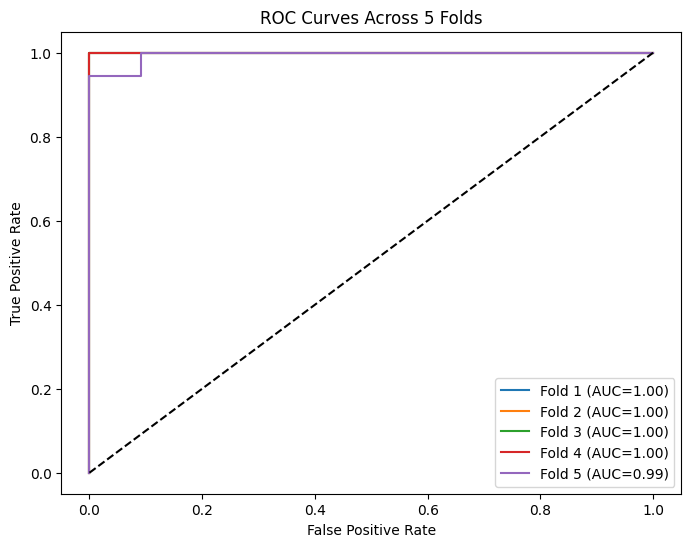

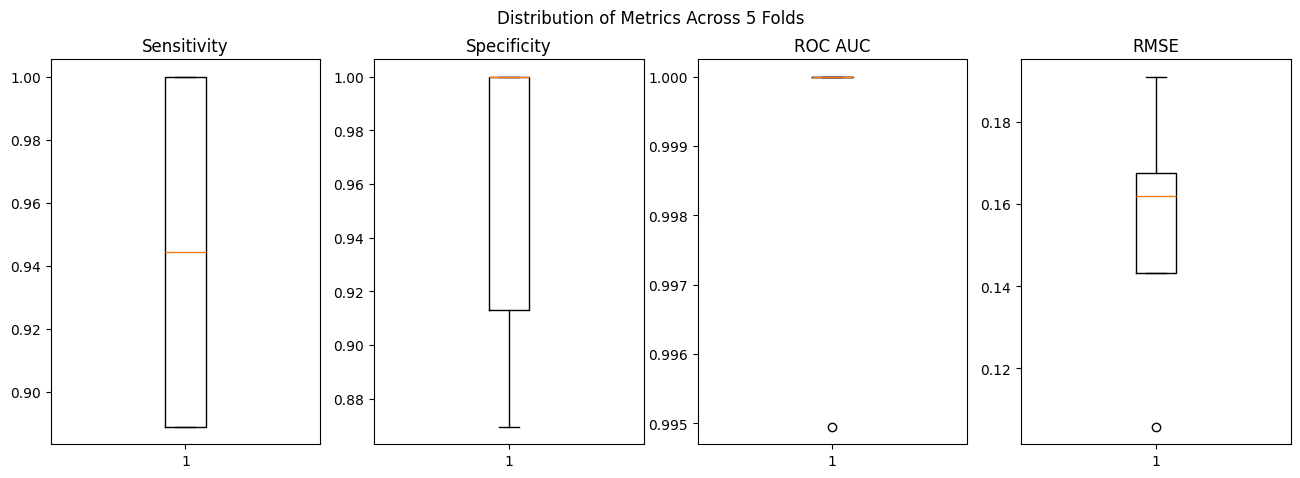

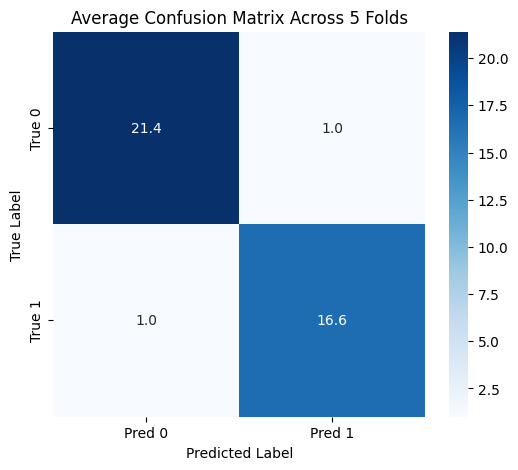

5-Fold Cross Validation Results:
Sensitivity: 0.944 ± 0.050
Specificity: 0.957 ± 0.055
ROC AUC: 0.999 ± 0.002
RMSE: 0.154 ± 0.028


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, confusion_matrix, mean_squared_error, roc_curve

# Load dataset
df = pd.read_csv("ecoli_mdr_dataset.csv")

# Features and target
X = df.drop(columns=["StrainID", "Source", "MDR_Label"])
y = df["MDR_Label"]

# Initialize 5-fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

sensitivity_scores = []
specificity_scores = []
roc_scores = []
rmse_scores = []

# Confusion matrix accumulator
cm_total = np.zeros((2, 2))

plt.figure(figsize=(8, 6))

for fold, (train_index, test_index) in enumerate(skf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train SVM classifier
    model = SVC(kernel="rbf", probability=True, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_total += cm
    tn, fp, fn, tp = cm.ravel()

    # Metrics
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_test, y_prob)
    rmse = np.sqrt(mean_squared_error(y_test, y_prob)) # Removed squared=False and took square root

    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    roc_scores.append(roc_auc)
    rmse_scores.append(rmse)

    # ROC curve for this fold
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"Fold {fold} (AUC={roc_auc:.2f})")

# Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Across 5 Folds")
plt.legend()
plt.show()

# Boxplots of metrics
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

axs[0].boxplot(sensitivity_scores)
axs[0].set_title("Sensitivity")

axs[1].boxplot(specificity_scores)
axs[1].set_title("Specificity")

axs[2].boxplot(roc_scores)
axs[2].set_title("ROC AUC")

axs[3].boxplot(rmse_scores)
axs[3].set_title("RMSE")

plt.suptitle("Distribution of Metrics Across 5 Folds")
plt.show()

# Average confusion matrix
cm_avg = cm_total / 5
plt.figure(figsize=(6, 5))
sns.heatmap(cm_avg, annot=True, fmt=".1f", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title("Average Confusion Matrix Across 5 Folds")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Report average metrics
print("5-Fold Cross Validation Results:")
print(f"Sensitivity: {np.mean(sensitivity_scores):.3f} ± {np.std(sensitivity_scores):.3f}")
print(f"Specificity: {np.mean(specificity_scores):.3f} ± {np.std(specificity_scores):.3f}")
print(f"ROC AUC: {np.mean(roc_scores):.3f} ± {np.std(roc_scores):.3f}")
print(f"RMSE: {np.mean(rmse_scores):.3f} ± {np.std(rmse_scores):.3f}")

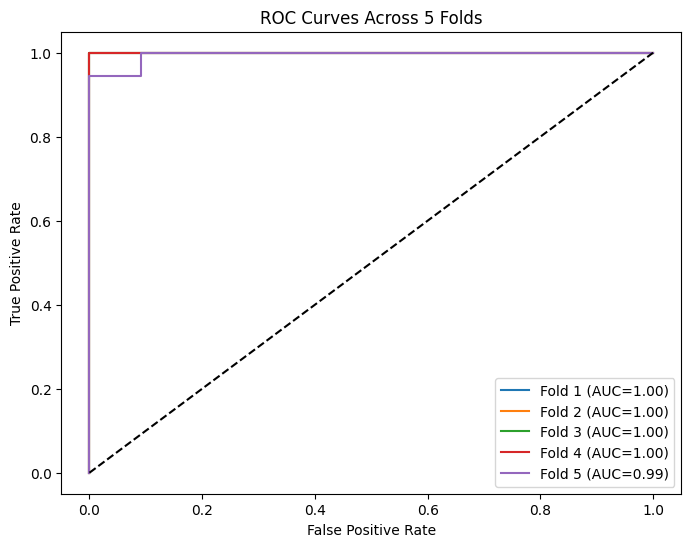

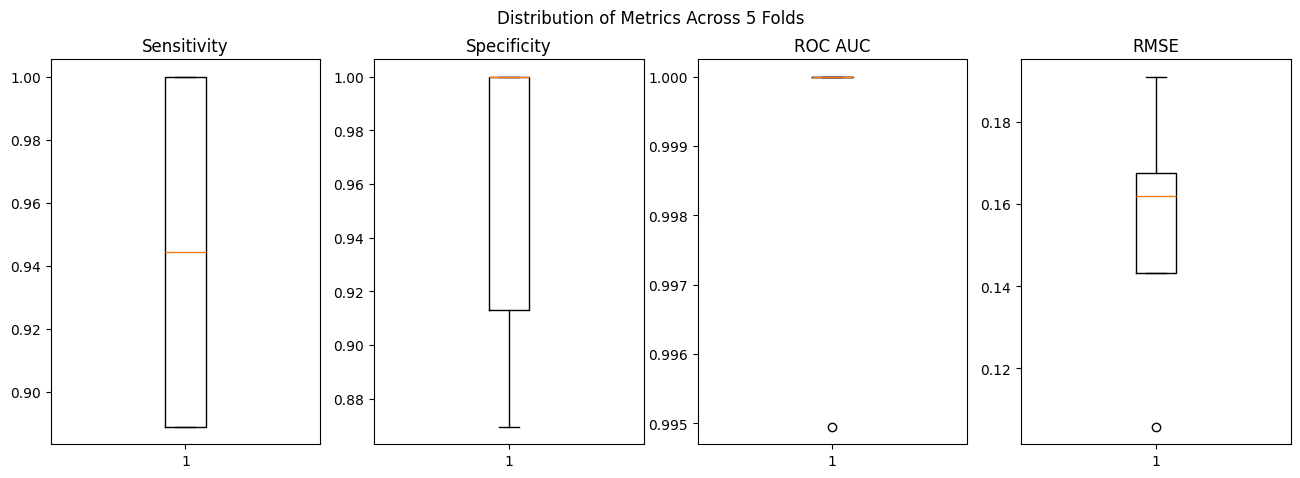

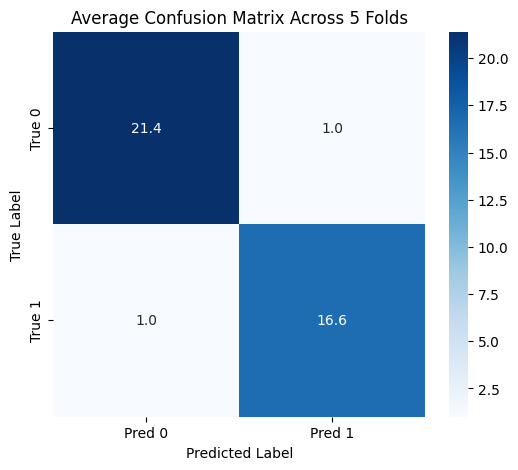

5-Fold Cross Validation Results:
Sensitivity: 0.944 ± 0.050
Specificity: 0.957 ± 0.055
ROC AUC: 0.999 ± 0.002
RMSE: 0.154 ± 0.028


AttributeError: 'float' object has no attribute 'keys'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, confusion_matrix, mean_squared_error, roc_curve, classification_report

# Load dataset
df = pd.read_csv("ecoli_mdr_dataset.csv")

# Features and target
X = df.drop(columns=["StrainID", "Source", "MDR_Label"])
y = df["MDR_Label"]

# Initialize 5-fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

sensitivity_scores = []
specificity_scores = []
roc_scores = []
rmse_scores = []
reports = []

# Confusion matrix accumulator
cm_total = np.zeros((2, 2))

plt.figure(figsize=(8, 6))

for fold, (train_index, test_index) in enumerate(skf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train SVM classifier
    model = SVC(kernel="rbf", probability=True, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_total += cm
    tn, fp, fn, tp = cm.ravel()

    # Metrics
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_test, y_prob)
    rmse = np.sqrt(mean_squared_error(y_test, y_prob))

    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    roc_scores.append(roc_auc)
    rmse_scores.append(rmse)

    # Save classification report for each fold
    report = classification_report(y_test, y_pred, target_names=["Non-MDR", "MDR"], output_dict=True)
    reports.append(report)

    # ROC curve for this fold
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"Fold {fold} (AUC={roc_auc:.2f})")

# Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Across 5 Folds")
plt.legend()
plt.show()

# Boxplots of metrics
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

axs[0].boxplot(sensitivity_scores)
axs[0].set_title("Sensitivity")

axs[1].boxplot(specificity_scores)
axs[1].set_title("Specificity")

axs[2].boxplot(roc_scores)
axs[2].set_title("ROC AUC")

axs[3].boxplot(rmse_scores)
axs[3].set_title("RMSE")

plt.suptitle("Distribution of Metrics Across 5 Folds")
plt.show()

# Average confusion matrix
cm_avg = cm_total / 5
plt.figure(figsize=(6, 5))
sns.heatmap(cm_avg, annot=True, fmt=".1f", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title("Average Confusion Matrix Across 5 Folds")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Report average metrics
print("5-Fold Cross Validation Results:")
print(f"Sensitivity: {np.mean(sensitivity_scores):.3f} ± {np.std(sensitivity_scores):.3f}")
print(f"Specificity: {np.mean(specificity_scores):.3f} ± {np.std(specificity_scores):.3f}")
print(f"ROC AUC: {np.mean(roc_scores):.3f} ± {np.std(roc_scores):.3f}")
print(f"RMSE: {np.mean(rmse_scores):.3f} ± {np.std(rmse_scores):.3f}")

# Average classification report
avg_report = {}
for label in reports[0].keys():
    if label not in avg_report:
        avg_report[label] = {}
    for metric in reports[0][label].keys():
        avg_report[label][metric] = np.mean([r[label][metric] for r in reports])

print("\nAverage Classification Report Across 5 Folds:")
for label, metrics in avg_report.items():
    print(f"{label}: {metrics}")

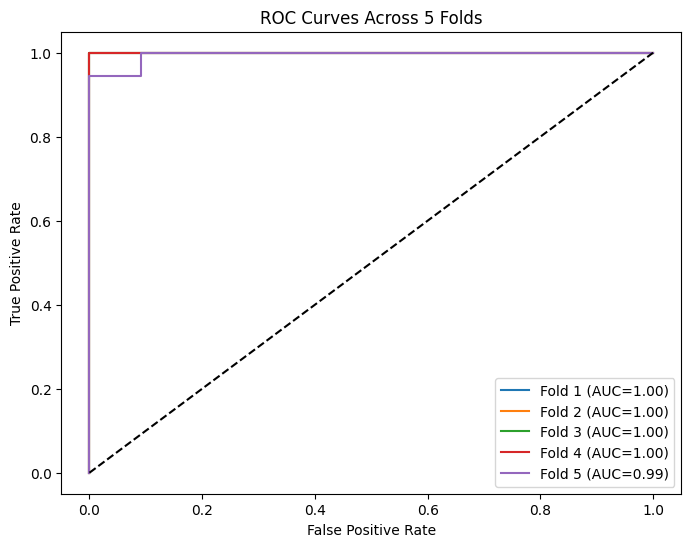

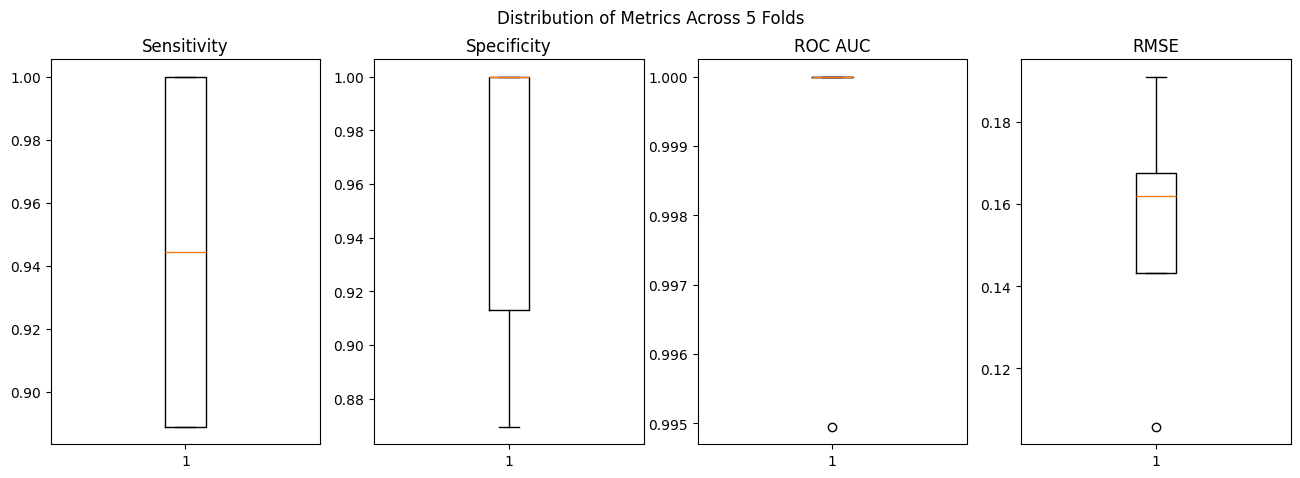

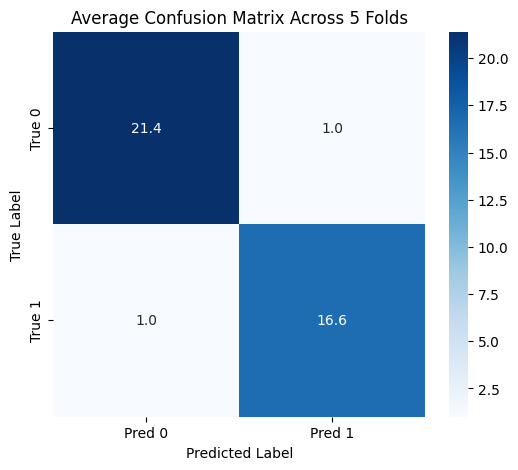

5-Fold Cross Validation Results:
Sensitivity: 0.944 ± 0.050
Specificity: 0.957 ± 0.055
ROC AUC: 0.999 ± 0.002
RMSE: 0.154 ± 0.028

Average Classification Report Across 5 Folds:
Non-MDR: {'precision': np.float64(0.9579710144927536), 'recall': np.float64(0.9565217391304348), 'f1-score': np.float64(0.9551198537447274), 'support': np.float64(22.4)}
MDR: {'precision': np.float64(0.9489473684210527), 'recall': np.float64(0.9444444444444444), 'f1-score': np.float64(0.9434289751936811), 'support': np.float64(17.6)}
accuracy: 0.950
macro avg: {'precision': np.float64(0.953459191456903), 'recall': np.float64(0.9504830917874397), 'f1-score': np.float64(0.9492744144692044), 'support': np.float64(40.0)}
weighted avg: {'precision': np.float64(0.9551866895499618), 'recall': np.float64(0.95), 'f1-score': np.float64(0.9499660316433646), 'support': np.float64(40.0)}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, confusion_matrix, mean_squared_error, roc_curve, classification_report

# Load dataset
df = pd.read_csv("ecoli_mdr_dataset.csv")

# Features and target
X = df.drop(columns=["StrainID", "Source", "MDR_Label"])
y = df["MDR_Label"]

# Initialize 5-fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

sensitivity_scores = []
specificity_scores = []
roc_scores = []
rmse_scores = []
reports = []

# Confusion matrix accumulator
cm_total = np.zeros((2, 2))

plt.figure(figsize=(8, 6))

for fold, (train_index, test_index) in enumerate(skf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train SVM classifier
    model = SVC(kernel="rbf", probability=True, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_total += cm
    tn, fp, fn, tp = cm.ravel()

    # Metrics
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_test, y_prob)
    rmse = np.sqrt(mean_squared_error(y_test, y_prob))

    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    roc_scores.append(roc_auc)
    rmse_scores.append(rmse)

    # Save classification report for each fold
    report = classification_report(y_test, y_pred, target_names=["Non-MDR", "MDR"], output_dict=True)
    reports.append(report)

    # ROC curve for this fold
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"Fold {fold} (AUC={roc_auc:.2f})")

# Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Across 5 Folds")
plt.legend()
plt.show()

# Boxplots of metrics
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

axs[0].boxplot(sensitivity_scores)
axs[0].set_title("Sensitivity")

axs[1].boxplot(specificity_scores)
axs[1].set_title("Specificity")

axs[2].boxplot(roc_scores)
axs[2].set_title("ROC AUC")

axs[3].boxplot(rmse_scores)
axs[3].set_title("RMSE")

plt.suptitle("Distribution of Metrics Across 5 Folds")
plt.show()

# Average confusion matrix
cm_avg = cm_total / 5
plt.figure(figsize=(6, 5))
sns.heatmap(cm_avg, annot=True, fmt=".1f", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title("Average Confusion Matrix Across 5 Folds")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Report average metrics
print("5-Fold Cross Validation Results:")
print(f"Sensitivity: {np.mean(sensitivity_scores):.3f} ± {np.std(sensitivity_scores):.3f}")
print(f"Specificity: {np.mean(specificity_scores):.3f} ± {np.std(specificity_scores):.3f}")
print(f"ROC AUC: {np.mean(roc_scores):.3f} ± {np.std(roc_scores):.3f}")
print(f"RMSE: {np.mean(rmse_scores):.3f} ± {np.std(rmse_scores):.3f}")

# Average classification report
avg_report = {}
keys = reports[0].keys()

for label in keys:
    if label == 'accuracy':
        avg_report[label] = np.mean([r[label] for r in reports])
    else:
        avg_report[label] = {}
        for metric in reports[0][label]:
            try:
                avg_report[label][metric] = np.mean([r[label][metric] for r in reports])
            except TypeError:
                # This part is not needed anymore with the accuracy check
                pass # Keep for safety, though

print("\nAverage Classification Report Across 5 Folds:")
for label, metrics in avg_report.items():
    if label == 'accuracy':
        print(f"{label}: {metrics:.3f}")
    else:
        print(f"{label}: {metrics}")

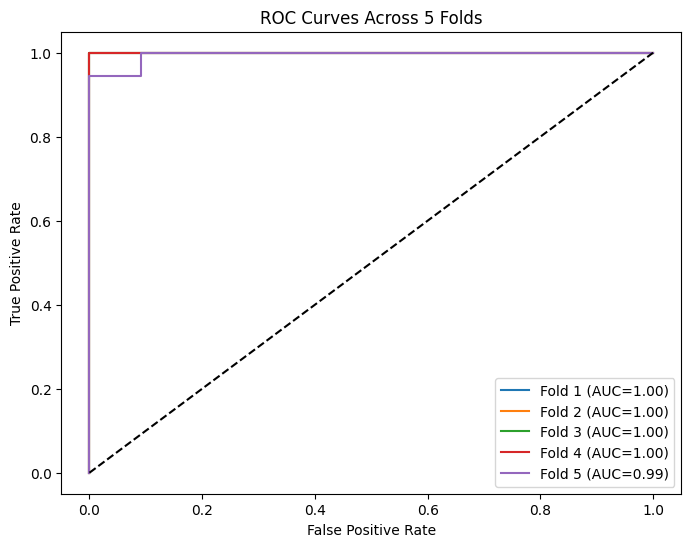

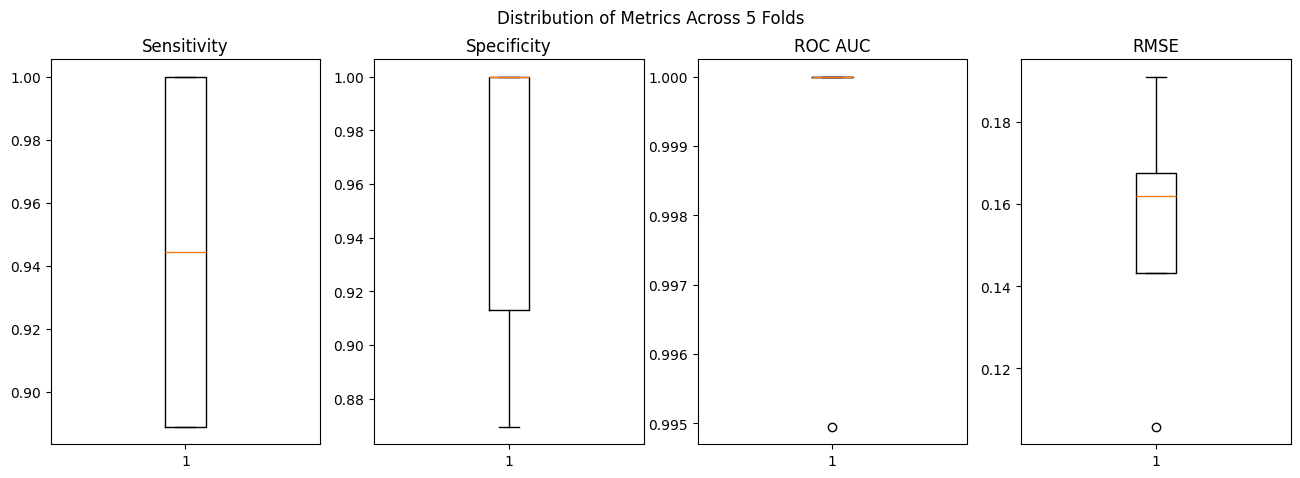

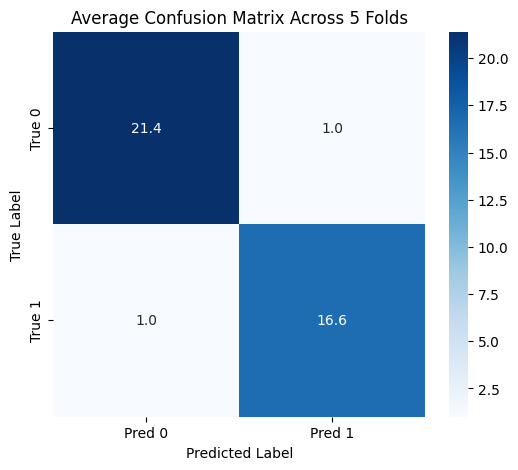

5-Fold Cross Validation Results:
Sensitivity: 0.944 ± 0.050
Specificity: 0.957 ± 0.055
ROC AUC: 0.999 ± 0.002
RMSE: 0.154 ± 0.028

Average Classification Report Across 5 Folds:
Non-MDR: {'precision': np.float64(0.9579710144927536), 'recall': np.float64(0.9565217391304348), 'f1-score': np.float64(0.9551198537447274), 'support': np.float64(22.4)}
MDR: {'precision': np.float64(0.9489473684210527), 'recall': np.float64(0.9444444444444444), 'f1-score': np.float64(0.9434289751936811), 'support': np.float64(17.6)}
accuracy: 0.95
macro avg: {'precision': np.float64(0.953459191456903), 'recall': np.float64(0.9504830917874397), 'f1-score': np.float64(0.9492744144692044), 'support': np.float64(40.0)}
weighted avg: {'precision': np.float64(0.9551866895499618), 'recall': np.float64(0.95), 'f1-score': np.float64(0.9499660316433646), 'support': np.float64(40.0)}

Average classification report saved to 'average_classification_report.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, confusion_matrix, mean_squared_error, roc_curve, classification_report

# Load dataset
df = pd.read_csv("ecoli_mdr_dataset.csv")

# Features and target
X = df.drop(columns=["StrainID", "Source", "MDR_Label"])
y = df["MDR_Label"]

# Initialize 5-fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

sensitivity_scores = []
specificity_scores = []
roc_scores = []
rmse_scores = []
reports = []

# Confusion matrix accumulator
cm_total = np.zeros((2, 2))

plt.figure(figsize=(8, 6))

for fold, (train_index, test_index) in enumerate(skf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train SVM classifier
    model = SVC(kernel="rbf", probability=True, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_total += cm
    tn, fp, fn, tp = cm.ravel()

    # Metrics
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_test, y_prob)
    rmse = np.sqrt(mean_squared_error(y_test, y_prob))

    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    roc_scores.append(roc_auc)
    rmse_scores.append(rmse)

    # Save classification report for each fold
    report = classification_report(y_test, y_pred, target_names=["Non-MDR", "MDR"], output_dict=True)
    reports.append(report)

    # ROC curve for this fold
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"Fold {fold} (AUC={roc_auc:.2f})")

# Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Across 5 Folds")
plt.legend()
plt.show()

# Boxplots of metrics
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

axs[0].boxplot(sensitivity_scores)
axs[0].set_title("Sensitivity")

axs[1].boxplot(specificity_scores)
axs[1].set_title("Specificity")

axs[2].boxplot(roc_scores)
axs[2].set_title("ROC AUC")

axs[3].boxplot(rmse_scores)
axs[3].set_title("RMSE")

plt.suptitle("Distribution of Metrics Across 5 Folds")
plt.show()

# Average confusion matrix
cm_avg = cm_total / 5
plt.figure(figsize=(6, 5))
sns.heatmap(cm_avg, annot=True, fmt=".1f", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title("Average Confusion Matrix Across 5 Folds")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Report average metrics
print("5-Fold Cross Validation Results:")
print(f"Sensitivity: {np.mean(sensitivity_scores):.3f} ± {np.std(sensitivity_scores):.3f}")
print(f"Specificity: {np.mean(specificity_scores):.3f} ± {np.std(specificity_scores):.3f}")
print(f"ROC AUC: {np.mean(roc_scores):.3f} ± {np.std(roc_scores):.3f}")
print(f"RMSE: {np.mean(rmse_scores):.3f} ± {np.std(rmse_scores):.3f}")

# Average classification report
avg_report = {}
keys = reports[0].keys()

for label in keys:
    avg_report[label] = {}
    if isinstance(reports[0][label], dict):
        for metric in reports[0][label]:
            avg_report[label][metric] = np.mean([r[label][metric] for r in reports])
    else:
        avg_report[label] = np.mean([r[label] for r in reports])

print("\nAverage Classification Report Across 5 Folds:")
for label, metrics in avg_report.items():
    print(f"{label}: {metrics}")

# Export classification report to CSV
report_rows = []
for label, metrics in avg_report.items():
    if isinstance(metrics, dict):
        row = {"Label": label}
        row.update(metrics)
        report_rows.append(row)
    else:
        report_rows.append({"Label": label, "Value": metrics})

report_df = pd.DataFrame(report_rows)
report_df.to_csv("average_classification_report.csv", index=False)
print("\nAverage classification report saved to 'average_classification_report.csv'")